## $\alpha$ analysis: r-fidelity and hit variation 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import gzip
import pickle
import datetime

from collections import defaultdict
from scipy.spatial.distance import hamming
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
blackbox_list = ['rf', 'svm', 'mlp']
bb_name_map = {
    'rf': 'RF',
    'svm': 'SVM',
    'mlp': 'MLP'
}

In [3]:
mixed_fidelity_sn = defaultdict(lambda: defaultdict(list))
mixed_fidelity_rn = defaultdict(lambda: defaultdict(list))
mixed_hit = defaultdict(lambda: defaultdict(list))

resfile = gzip.open('../output/new_yeast_alphabeta.json.gz', 'rb')
for row in resfile:
    r = json.loads(row.decode('utf-8').strip())
    bb_name = r['bb_name']
    dataset_name = r['dataset_name']
    alpha = float(r['alpha'])
    mixed_fidelity_sn[bb_name][alpha].append(float(r['fidelity_tree1_syn']))
    mixed_fidelity_rn[bb_name][alpha].append(float(r['fidelity_tree1_kNN']))
    mixed_hit[bb_name][alpha].append(1.0 - float(r['hit_sm_tree1']))
resfile.close()

In [4]:
rescale = 1
height = int(4*rescale)
width = int(15*rescale)

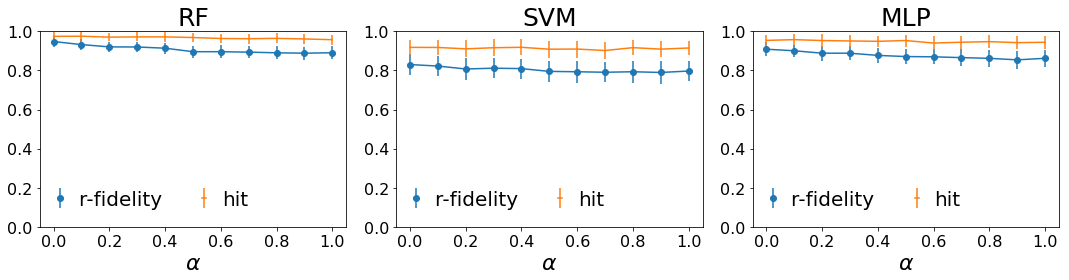

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(width, height))
alphas = [np.round(x, 2) for x in np.arange(0.0, 1.1, 0.1)]

for ax, bb_name in zip(axes.flat,blackbox_list):
    fs_means = list()
    fs_std = list()
    fr_means = list()
    fr_std = list()
    hit_means = list()
    hit_std = list()
    for alpha in alphas:
        fs_means.append(np.mean(mixed_fidelity_sn[bb_name][alpha]))
        fs_std.append(np.std(mixed_fidelity_sn[bb_name][alpha]))
        fr_means.append(np.mean(mixed_fidelity_rn[bb_name][alpha]))
        fr_std.append(np.std(mixed_fidelity_rn[bb_name][alpha]))
        hit_means.append(np.mean(mixed_hit[bb_name][alpha]))
        hit_std.append(np.std(mixed_hit[bb_name][alpha]))
    
    ax.errorbar(alphas, fr_means, yerr=np.array(fr_std)/2, marker='o', label='r-fidelity')
    ax.errorbar(alphas, hit_means, yerr=np.array(hit_std)/2, marker='', label='hit')
    ax.set_ylim([0, 1.0])
    ax.set_title(bb_name_map[bb_name] , fontsize=25)
    ax.set_xlabel(r'$\alpha$', fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(loc='lower left', fontsize=20, ncol=2, labelspacing=0, handlelength=0.2, frameon=False)
    
#fig.suptitle('Yeast dataset',fontsize = 30, y=1.06)
fig.tight_layout()
fig.savefig('../fig/new_yeast_all_bb_alpha.png', format='png', bbox_inches='tight')

In [6]:
mixed_fidelity_sn = defaultdict(lambda: defaultdict(list))
mixed_fidelity_rn = defaultdict(lambda: defaultdict(list))
mixed_hit = defaultdict(lambda: defaultdict(list))


resfile = gzip.open('../output/woman_alphabeta.json.gz', 'rb')
for row in resfile:
    r = json.loads(row.decode('utf-8').strip())
    bb_name = r['bb_name']
    dataset_name = r['dataset_name']
    alpha = float(r['alpha'])
    mixed_fidelity_sn[bb_name][alpha].append(float(r['fidelity_tree1_syn']))
    mixed_fidelity_rn[bb_name][alpha].append(float(r['fidelity_tree1_kNN']))
    mixed_hit[bb_name][alpha].append(1.0 - float(r['hit_sm_tree1']))
resfile.close()

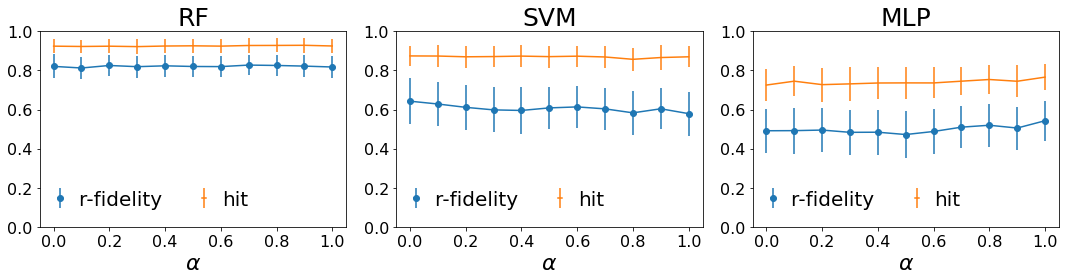

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(width, height))
alphas = [np.round(x, 2) for x in np.arange(0.0, 1.1, 0.1)]

for ax, bb_name in zip(axes.flat,blackbox_list):
    fs_means = list()
    fs_std = list()
    fr_means = list()
    fr_std = list()
    hit_means = list()
    hit_std = list()
    for alpha in alphas:
        fs_means.append(np.mean(mixed_fidelity_sn[bb_name][alpha]))
        fs_std.append(np.std(mixed_fidelity_sn[bb_name][alpha]))
        fr_means.append(np.mean(mixed_fidelity_rn[bb_name][alpha]))
        fr_std.append(np.std(mixed_fidelity_rn[bb_name][alpha]))
        hit_means.append(np.mean(mixed_hit[bb_name][alpha]))
        hit_std.append(np.std(mixed_hit[bb_name][alpha]))
    
    ax.errorbar(alphas, fr_means, yerr=np.array(fr_std)/2, marker='o', label='r-fidelity')
    ax.errorbar(alphas, hit_means, yerr=np.array(hit_std)/2, marker='', label='hit')
    ax.set_ylim([0, 1.0])
    ax.set_title(bb_name_map[bb_name] , fontsize=25)
    ax.set_xlabel(r'$\alpha$', fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(loc='lower left', fontsize=20, ncol=2, labelspacing=0, handlelength=0.2, frameon=False)
    
    #plt.show()
#fig.suptitle('Woman dataset',fontsize = 30, y=1.06)
fig.tight_layout()
fig.savefig('../fig/woman_all_bb_alpha.png', format='png', bbox_inches='tight')